# **Task 3 - EDA (RETAIL)**

In [42]:
import pandas as pd
import numpy as n
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

import warnings as wg
wg.filterwarnings("ignore")

In [43]:
path="/content/drive/MyDrive/DATASETS/SparksFoundation_Dataset/task3_SampleSuperstore.csv"

In [44]:
retail = pd.read_csv(path)

In [45]:
retail.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [46]:
retail.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


# DATA PREPROCESSING

In [48]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [49]:
retail.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [50]:
retail.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [53]:
retail.shape

(9994, 13)

In [51]:
retail.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [52]:
retail.duplicated().sum()

17

In [54]:
retail.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [55]:
retail.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [56]:
Retail= retail.drop(['Postal Code'], axis=1)

In [57]:
Retail

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


# Exploratory Data Analysis

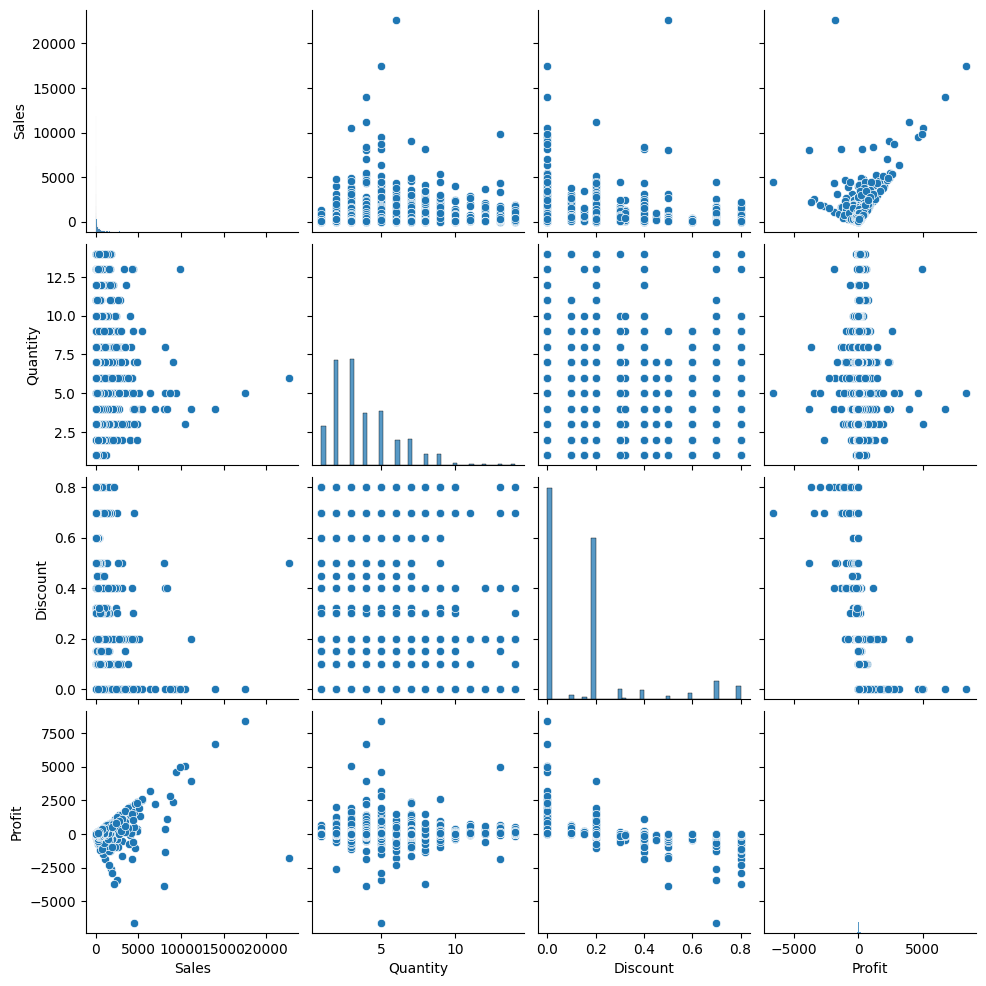

In [58]:
sns.pairplot(Retail)

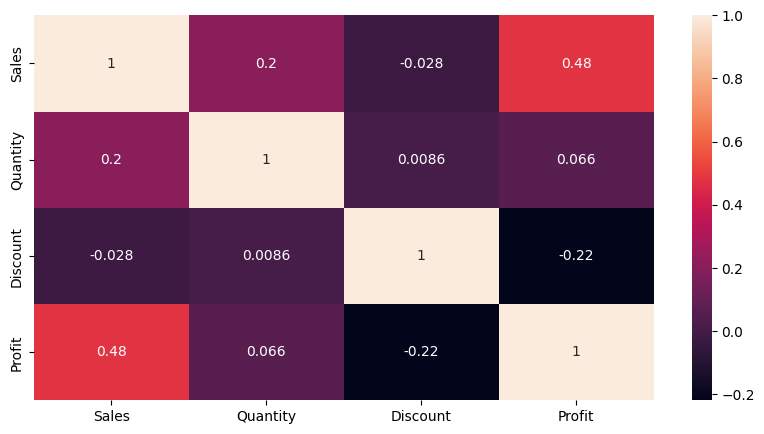

In [59]:
Retail.corr()
plt.figure(figsize=(10,5))
sns.heatmap(Retail.corr(), annot= True)
plt.show()

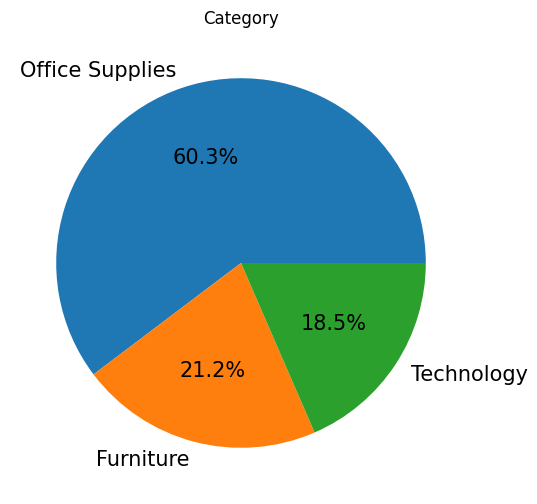

In [60]:
plt.figure(figsize=(6,6))
textprops = {"fontsize":15}
plt.title('Category')
plt.pie(Retail['Category'].value_counts(), labels = Retail['Category'].value_counts().index, autopct= '%1.1f%%', textprops=textprops)
plt.show()

<Figure size 1000x1000 with 0 Axes>

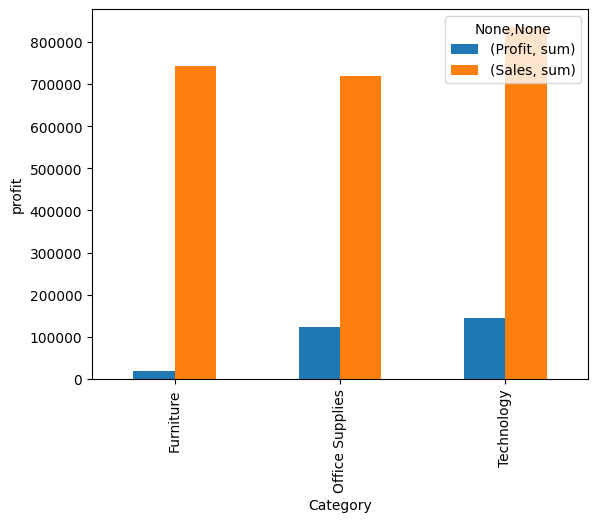

In [61]:
plt.figure(figsize=(10,10))
Retail.groupby('Category')['Profit', 'Sales'].agg(['sum']).plot.bar()
plt.ylabel('profit')
plt.show()

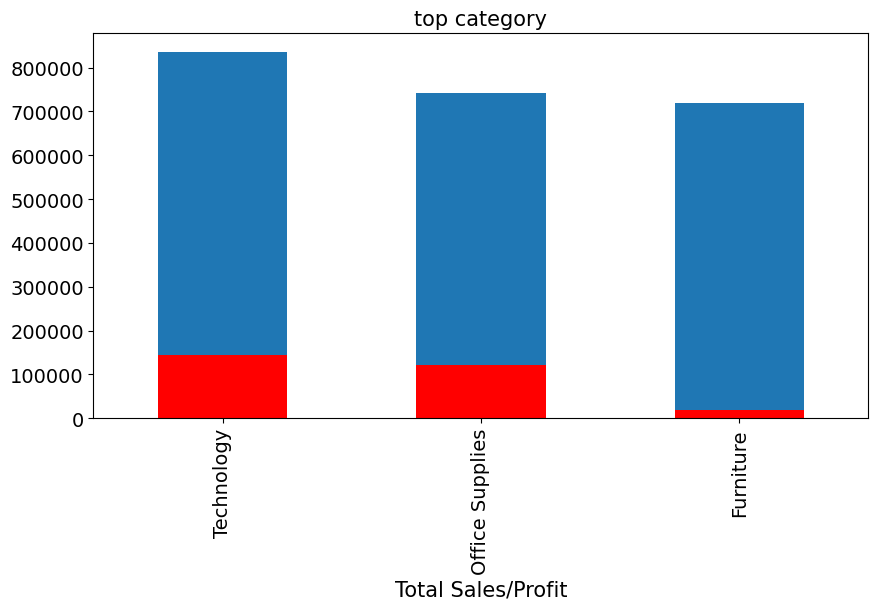

In [64]:
#top category in terms of sales and profit

top_category_sales = Retail.groupby("Category").Sales.sum().nlargest(n=100)

top_category_profit = Retail.groupby("Category").Profit.sum().nlargest(n=100)


#plotting to see it visually


top_category_sales.plot(kind = 'bar', figsize = (10,5), fontsize = 14)

top_category_profit.plot(kind = 'bar', figsize = (10,5), fontsize = 14, color='red')

plt.xlabel('Category', fontsize=15)
plt.xlabel('Total Sales/Profit', fontsize=15)
plt.title("Top Category Profit vs Sales", fontsize=15)
plt.show()

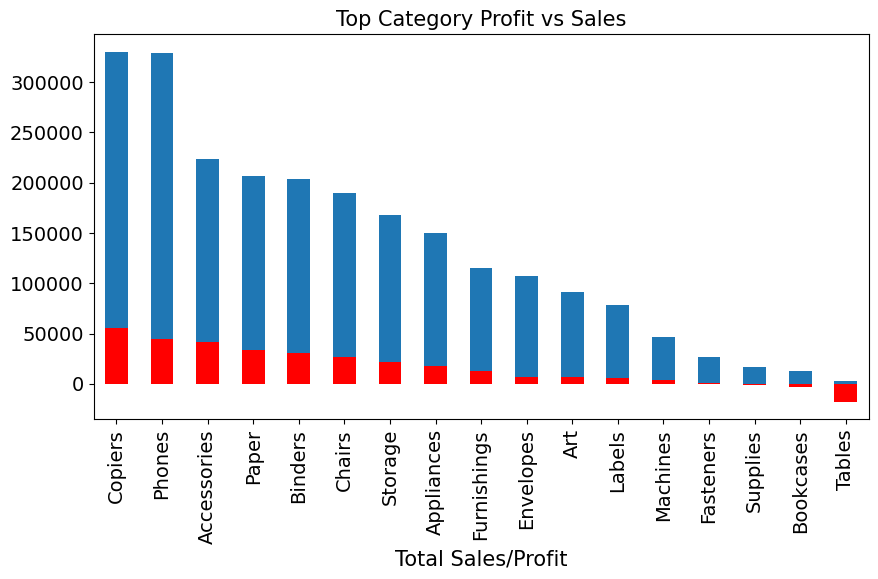

In [65]:
#top category in terms of sales and profit

top_subcategory_sales = Retail.groupby("Sub-Category").Sales.sum().nlargest(n=100)

top_subcategory_profit = Retail.groupby("Sub-Category").Profit.sum().nlargest(n=100)


#plotting to see it visually


top_subcategory_sales.plot(kind = 'bar', figsize = (10,5), fontsize = 14)

top_subcategory_profit.plot(kind = 'bar', figsize = (10,5), fontsize = 14, color='red')

plt.xlabel('Sub-Category', fontsize=15)
plt.xlabel('Total Sales/Profit', fontsize=15)
plt.title("Top Category Profit vs Sales", fontsize=15)
plt.show()

<Axes: ylabel='Sub-Category'>

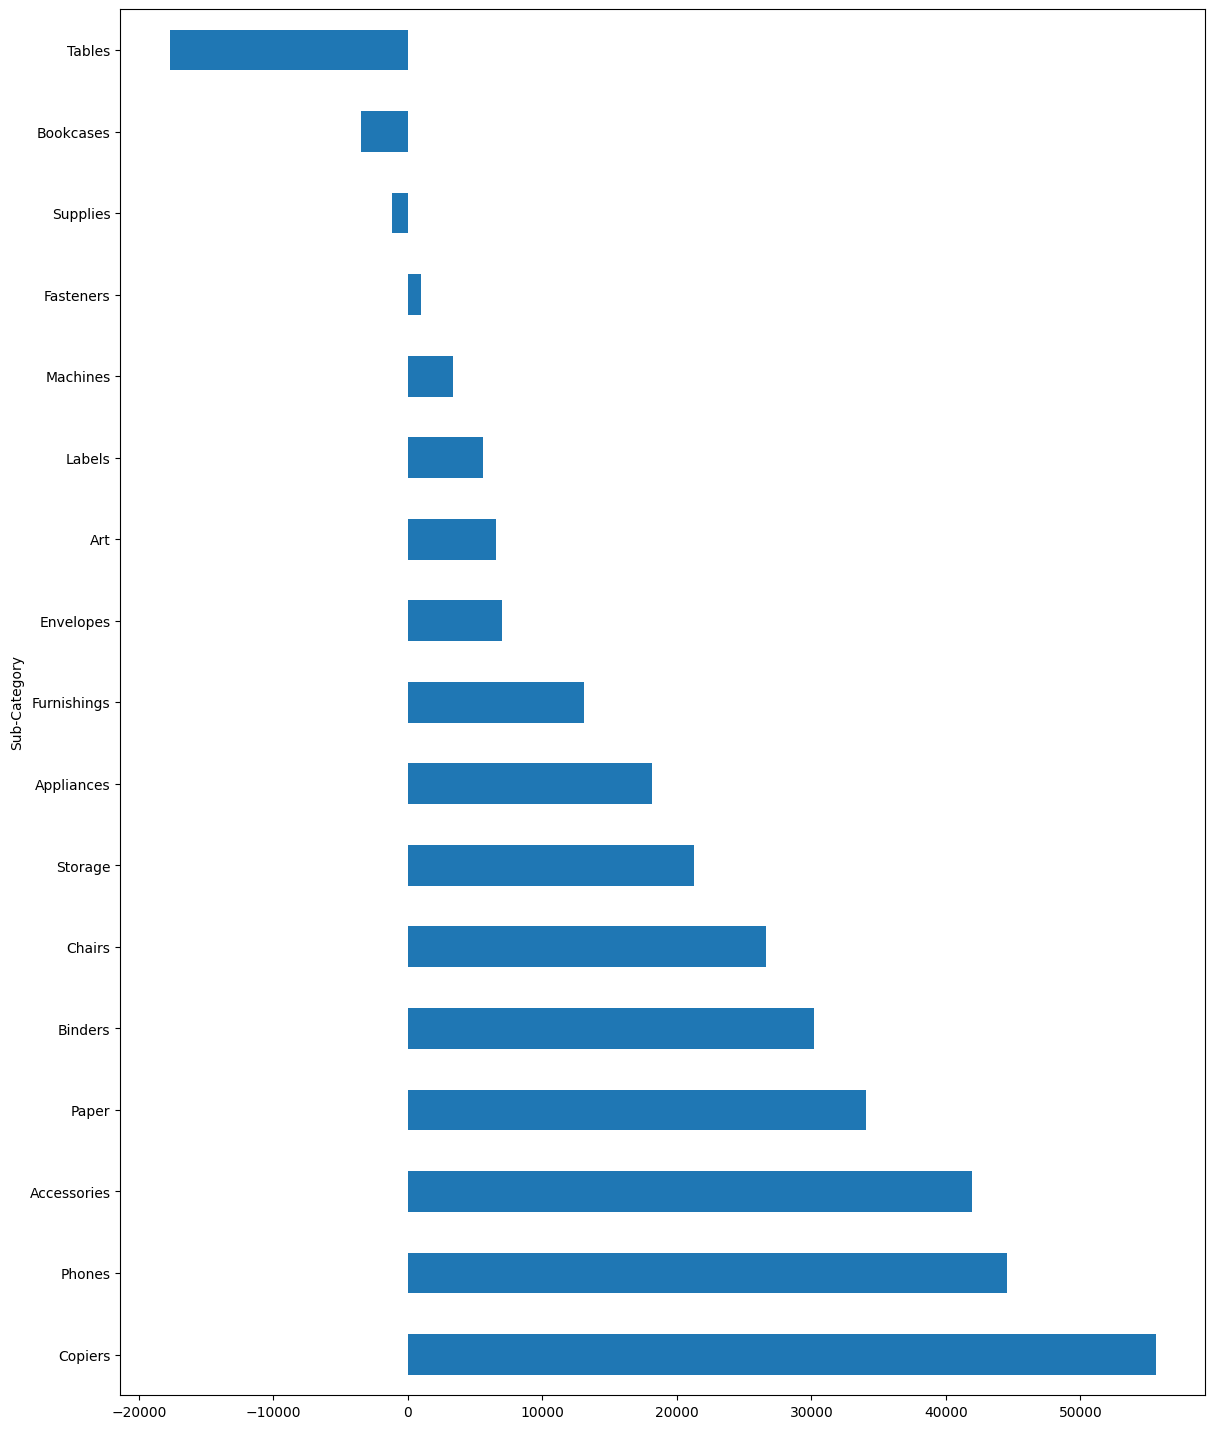

In [70]:
#Detailed View

plt.figure(figsize=(14,18))
statewise = Retail.groupby(['Sub-Category'])['Profit'].sum().nlargest(50)
statewise.plot.barh()  #h for horizontal

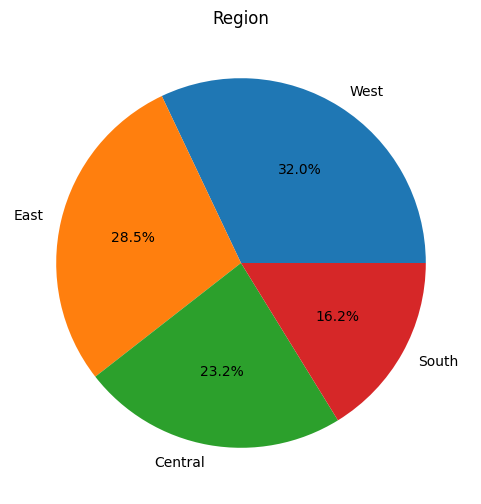

In [75]:
plt.figure(figsize=(6,6))
plt.title('Region')
plt.pie(Retail['Region'].value_counts(), labels = Retail['Region'].value_counts().index, autopct= '%1.1f%%')
plt.show()

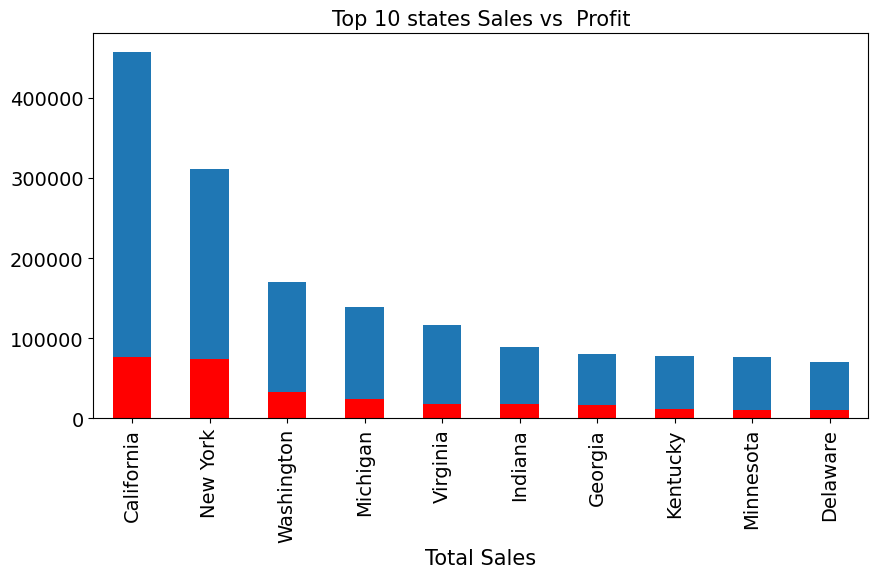

In [77]:
#top category in terms of sales and profit

top_states_sales = Retail.groupby("State").Sales.sum().nlargest(n=10)

top_states_profit = Retail.groupby("State").Profit.sum().nlargest(n=10)


#plotting to see it visually


top_states_sales.plot(kind = 'bar', figsize = (10,5), fontsize = 14)

top_states_profit.plot(kind = 'bar', figsize = (10,5), fontsize = 14, color='red')

plt.xlabel('States', fontsize=15)
plt.xlabel('Total Sales', fontsize=15)
plt.title("Top 10 states Sales vs  Profit", fontsize=15)
plt.show()

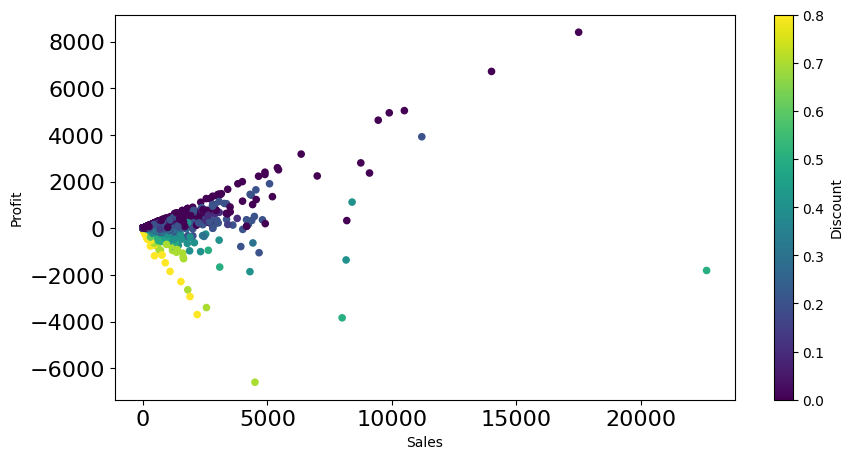

In [83]:
Retail.plot(kind = "scatter", figsize = (10,5), x = "Sales", y = "Profit", c = "Discount", s=20, fontsize = 16, colormap = "viridis")
plt.ylabel = ('total Profits')
plt.title = ("interdependency of sales, profit and discounts")
plt.show()

# **CONCLUSION**



### * We should restrict furniture sales while increasing sales of technology and office supplies.

### * Table sales in the subcategories should be kept to a minimum.

### * Increase eastern sales because it is more profitable.
### *   We should focus more on states like California and New York to increase profits.
